# Youtube Engagement Analysis
## The pusrpose of this notebook is to do adjust the raw engagement numbers for youtube videos to account for bias in the data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, iqr

In [2]:
import datetime

In [3]:
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

## Read Input Data

In [4]:
input_data = pd.read_csv('USvideos.csv')
# Convert raw category_id to more interprettable category name
input_data['category_name'] = np.nan

input_data.loc[(input_data["category_id"] == 1),"category_name"] = 'Film and Animation'
input_data.loc[(input_data["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
input_data.loc[(input_data["category_id"] == 10),"category_name"] = 'Music'
input_data.loc[(input_data["category_id"] == 15),"category_name"] = 'Pets and Animals'
input_data.loc[(input_data["category_id"] == 17),"category_name"] = 'Sport'
input_data.loc[(input_data["category_id"] == 19),"category_name"] = 'Travel and Events'
input_data.loc[(input_data["category_id"] == 20),"category_name"] = 'Gaming'
input_data.loc[(input_data["category_id"] == 22),"category_name"] = 'People and Blogs'
input_data.loc[(input_data["category_id"] == 23),"category_name"] = 'Comedy'
input_data.loc[(input_data["category_id"] == 24),"category_name"] = 'Entertainment'
input_data.loc[(input_data["category_id"] == 25),"category_name"] = 'News and Politics'
input_data.loc[(input_data["category_id"] == 26),"category_name"] = 'How to and Style'
input_data.loc[(input_data["category_id"] == 27),"category_name"] = 'Education'
input_data.loc[(input_data["category_id"] == 28),"category_name"] = 'Science and Technology'
input_data.loc[(input_data["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
input_data.loc[(input_data["category_id"] == 25),"category_name"] = 'News & Politics'
input_data.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description     category_name  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People and Blogs  
1  One year after the presidential election, John...     Entertainment  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...            Comedy  
3  Today we find out if Link is a Nickelback amat...     Entertainment  
4  I know it's been a while since we did this sho...     Entertainment

In [5]:
input_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

This comprehensive YouTube Video Analytics Dataset provides valuable insights into the performance of a wide range of videos on the popular platform. Spanning various genres, the dataset encompasses essential information such as - 1.Category 2.video titles, 3.publish times, 4.view, 5.likes, 6.dislikes, 7.comments

## Remove duplicates

In [6]:
input_data_subset = input_data[['video_id', 'category_name', 'title', 'description', 'channel_title']].drop_duplicates() \
                    .reset_index(drop = True)
input_data_subset['index']  =input_data_subset.index
input_data_subset["RANK"] = input_data_subset.groupby("video_id")["index"].rank(method="first", ascending=True)
input_data_subset = input_data_subset[input_data_subset.RANK == 1].reset_index(drop = True)
input_data_subset.head()

video_id     category_name  \
0  2kyS6SvSYSE  People and Blogs   
1  1ZAPwfrtAFY     Entertainment   
2  5qpjK5DgCt4            Comedy   
3  puqaWrEC7tY     Entertainment   
4  d380meD0W0M     Entertainment   

                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                         description          channel_title  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...           CaseyNeistat   
1  One year after the presidential election, John...        LastWeekTonight   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...           Rudy Mancuso   
3  Today we find out if Link is a Nickelback amat...  Good Mythical Morning   
4  I know it's been a while since we did this sho...               nigahiga   

   index  RANK  
0      0   1.0  
1      1   1.0  
2      2   1.0  
3      3   1.0  
4      4   1.0

In [7]:
print('Shape before: {}'.format(input_data.shape[0]))
print('Total video_ids  before: {}'.format(len(np.unique(input_data.video_id))))
input_data = input_data.drop(columns=['tags']).merge(input_data_subset, on = ['video_id', 'category_name', 'title', 'description', 'channel_title'])
print('Shape after: {}'.format(input_data.shape[0]))
print('Total video_ids after: {}'.format(len(np.unique(input_data.video_id))))

Shape before: 40949
Total video_ids  before: 6351
Shape after: 36594
Total video_ids after: 6351


## Analyze Input Data

Let's first start by analyzing what data is available

In [9]:
print('Total raw count: {}'.format(input_data.shape[0]))

Total raw count: 36594


### Category Name

In [10]:
# Column: Category
input_data[['video_id', 'category_name']].drop_duplicates().groupby(by = 'category_name').size().sort_values(ascending = False)

category_name
Entertainment               1619
Music                        799
How to and Style             595
Comedy                       547
News & Politics              505
People and Blogs             498
Sport                        451
Science and Technology       380
Film and Animation           318
Education                    250
Pets and Animals             138
Gaming                       103
Cars and Vehicles             70
Travel and Events             60
Non Profits and Activism      14
dtype: int64

Entertainment is the most popular category in terms of number of videos followed by Music ; How to and Style;
Non Profits and Activism is the least popular cateogry in terms of number of videos followed by Cars and Vehicles

### Trending Date
How much data we have per video_id?

Average number of trending days per video: 5.75




/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


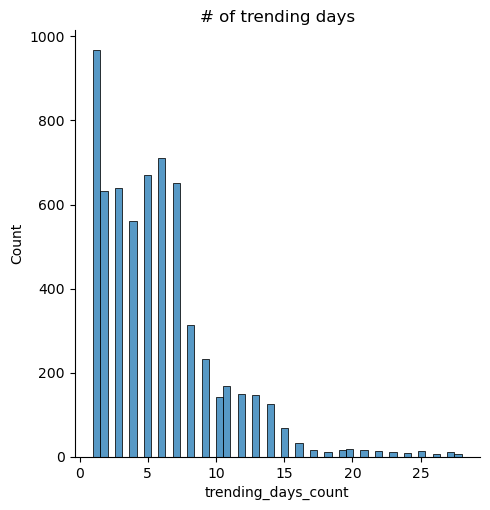

In [11]:
trending_days_per_video = input_data[['video_id', 'trending_date']].drop_duplicates().groupby(by = ['video_id']).size().reset_index()
trending_days_per_video.columns = ['video_id', 'trending_days_count']
print('Average number of trending days per video: {}'.format(np.round(np.mean(trending_days_per_video.trending_days_count), 2)))
print('\n')
sns.displot(trending_days_per_video.trending_days_count)
plt.title('# of trending days')
plt.show()

It looks we have engagement records for multiple days per video. We need to aggregate across these days to have an overall engagement metrics. In order to make sure all videos have an equal say (as some videos might have records for upto 30 days), we will average across the first 7 days since the date of publish

In [12]:
# Convert publish datetime to date
input_data['publish_date'] = pd.to_datetime(input_data['publish_time'])
input_data['publish_date'] = [x.date() for x in input_data.publish_date]
input_data.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  1ZAPwfrtAFY      17.15.11   
3  1ZAPwfrtAFY      17.16.11   
4  1ZAPwfrtAFY      17.17.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
3  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
4  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id              publish_time    views   likes  dislikes  \
0           22  2017-11-13T17:13:01.000Z   748374   57527      2966   
1           24  2017-11-13T07:30:00.000Z  2418783   97185      6146   
2           24  2017-11-13T07:30:00.000Z  4632016  131784      9892   
3           24  2017-11-13T07:30:00.000Z  5086221  137819     10468   
4           24  2017-11-13T07:30:00.000Z  5392036  142006     10797   

   comment_count                                  thumbnail_link  \
0          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2          18284  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
3          18395  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
4          18930  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description     category_name  index  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People and Blogs      0   
1  One year after the presidential election, John...     Entertainment      1   
2  One year after the presidential election, John...     Entertainment      1   
3  One year after the presidential election, John...     Entertainment      1   
4  One year after the presidential election, John...     Entertainment      1   

   RANK publish_date  
0   1.0   2017-11-13  
1   1.0   2017-11-13  
2   1.0   2017-11-13  
3   1.0   2017-11-13  
4   1.0   2017-11-13

In [13]:
# Get trending date from the string column
trending_year = [x.split('.')[0] for x in input_data.trending_date]
trending_year = [int('20' + x) for x in trending_year]
trending_day = [int(x.split('.')[1]) for x in input_data.trending_date]
trending_month = [int(x.split('.')[2]) for x in input_data.trending_date]
trending_datetime = [datetime.date(trending_year[i], trending_month[i], trending_day[i]) for i in range(len(trending_year))]
input_data['trending_datetime'] = trending_datetime
days_since_publish = [(input_data['trending_datetime'][i] - input_data['publish_date'][i]).days for i in range(len(trending_year))]

# Get days since publish column based on different in trending date and publish days
input_data['days_since_publish'] = days_since_publish
input_data.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  1ZAPwfrtAFY      17.15.11   
3  1ZAPwfrtAFY      17.16.11   
4  1ZAPwfrtAFY      17.17.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
3  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
4  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id              publish_time    views   likes  dislikes  \
0           22  2017-11-13T17:13:01.000Z   748374   57527      2966   
1           24  2017-11-13T07:30:00.000Z  2418783   97185      6146   
2           24  2017-11-13T07:30:00.000Z  4632016  131784      9892   
3           24  2017-11-13T07:30:00.000Z  5086221  137819     10468   
4           24  2017-11-13T07:30:00.000Z  5392036  142006     10797   

   comment_count  ... comments_disabled  ratings_disabled  \
0          15954  ...             False             False   
1          12703  ...             False             False   
2          18284  ...             False             False   
3          18395  ...             False             False   
4          18930  ...             False             False   

   video_error_or_removed                                        description  \
0                   False  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
1                   False  One year after the presidential election, John...   
2                   False  One year after the presidential election, John...   
3                   False  One year after the presidential election, John...   
4                   False  One year after the presidential election, John...   

      category_name index  RANK  publish_date trending_datetime  \
0  People and Blogs     0   1.0    2017-11-13        2017-11-14   
1     Entertainment     1   1.0    2017-11-13        2017-11-14   
2     Entertainment     1   1.0    2017-11-13        2017-11-15   
3     Entertainment     1   1.0    2017-11-13        2017-11-16   
4     Entertainment     1   1.0    2017-11-13        2017-11-17   

  days_since_publish  
0                  1  
1                  1  
2                  2  
3                  3  
4                  4  

[5 rows x 21 columns]

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

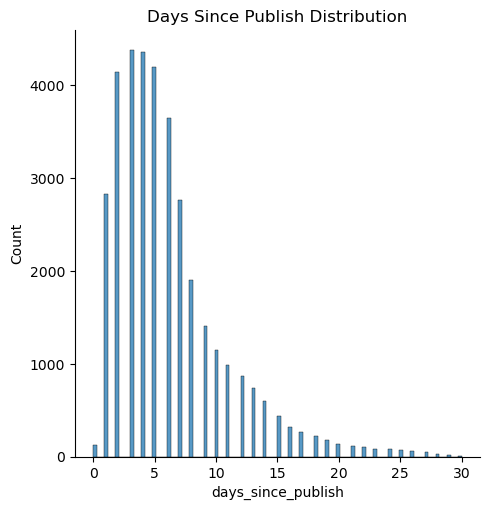

In [14]:
# Plot days_since_publish distribution
plt.figure(figsize = (8,6))
sns.displot(input_data[input_data.days_since_publish <= 30].days_since_publish)
plt.title('Days Since Publish Distribution')
plt.show()

### Aggregate engagement metrics per video

In [15]:
input_data = input_data[input_data.days_since_publish <= 7].reset_index(drop = True)
groupby_columns = ['video_id', 'title', 'channel_title', 'publish_time', 'category_name', 'thumbnail_link', 'description']
input_data_agg = input_data.groupby(by = groupby_columns) \
                           .agg({'views': ['sum'], 'likes': ['sum'], 'comment_count': ['sum'], 'trending_datetime': ['min']}) \
                           .reset_index()
input_data_agg.columns = groupby_columns + ['views', 'likes', 'comment_count', 'min_trending_date']
input_data_agg.head()

video_id                                              title  \
0  -0CMnp02rNY  Mindy Kaling's Daughter Had the Perfect Reacti...   
1  -0NYY8cqdiQ  Megan Mullally Didn't Notice the Interesting P...   
2  -1Hm41N0dUs  Cast of Avengers: Infinity War Draws Their Cha...   
3  -1yT-K3c6YI  YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...   
4  -2RVw2_QyxQ                     2017 Champions Showdown: Day 3   

            channel_title              publish_time     category_name  \
0            TheEllenShow  2018-06-04T13:00:00.000Z     Entertainment   
1            TheEllenShow  2018-01-29T14:00:39.000Z     Entertainment   
2       Jimmy Kimmel Live  2018-04-27T07:30:02.000Z            Comedy   
3             Molly Burke  2017-11-28T18:30:43.000Z  People and Blogs   
4  Saint Louis Chess Club  2017-11-12T02:39:01.000Z         Education   

                                   thumbnail_link  \
0  https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg   
1  https://i.ytimg.com/vi/-0NYY8cqdiQ/default.jpg   
2  https://i.ytimg.com/vi/-1Hm41N0dUs/default.jpg   
3  https://i.ytimg.com/vi/-1yT-K3c6YI/default.jpg   
4  https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg   

                                         description    views   likes  \
0  Ocean's 8 star Mindy Kaling dished on bringing...  4134702   52197   
1  Ellen and Megan Mullally have known each other...   563746    4429   
2  Benedict Cumberbatch, Don Cheadle, Elizabeth O...  5507675  112165   
3  Check out the video we did on the Merrell Twin...   777243   27305   
4  The Saint Louis Chess Club hosts a series of f...   208304    1351   

   comment_count min_trending_date  
0           2215        2018-06-06  
1             94        2018-02-01  
2           4386        2018-04-29  
3           2928        2017-11-29  
4             62        2017-11-14

In [16]:
input_data_agg[input_data_agg.video_id == 'ONI_06wGbsQ'][['video_id', 'title', 'channel_title', 'publish_time', 
                                                          'category_name', 'thumbnail_link', 'description']].drop_duplicates().head()

video_id                  title channel_title  \
2427  ONI_06wGbsQ  THINGS THAT ARE LOWER     Amber Liu   

                  publish_time  category_name  \
2427  2018-01-12T03:15:43.000Z  Entertainment   

                                      thumbnail_link  \
2427  https://i.ytimg.com/vi/ONI_06wGbsQ/default.jpg   

                                            description  
2427  LOOOWAHHH LOWAAAH~~ check out our new single!\...

### Engagement Data
A viewer on any youtube video has variety of options to engage with the content which includes Likes, Dislikes and Comments. Likes and Comments can be treated as positive engagement whereas Dislikes can betreated as negative engagement. We are only going to consider Likes and Comments as the engagement types for our analysis

Let's look at the distribution of Views, Likes and Comments

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

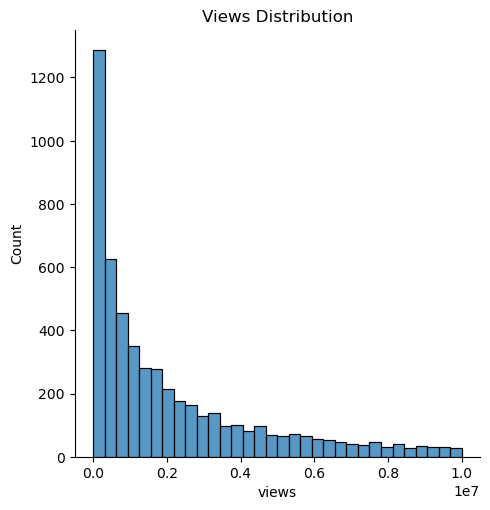

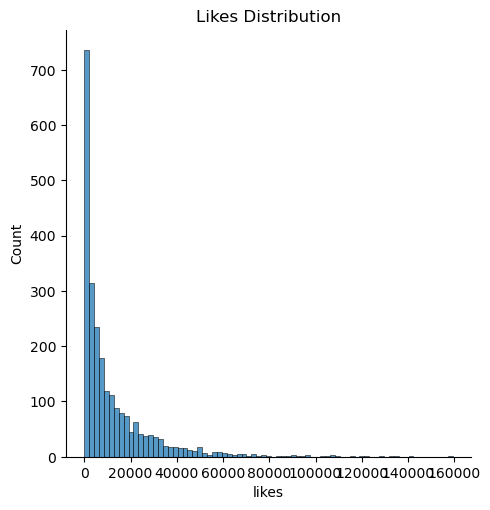

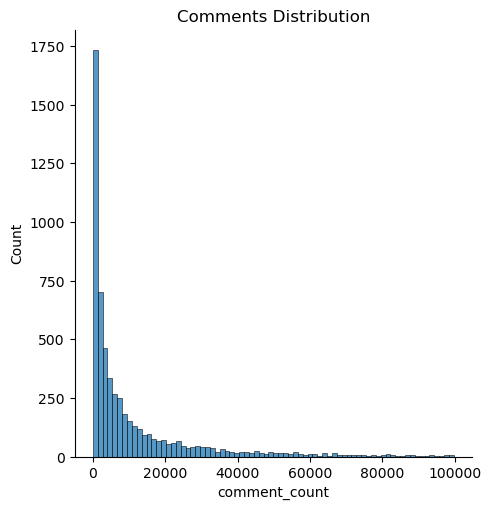

In [19]:
# Views
plt.figure(figsize=(8,6))
sns.displot(input_data_agg[input_data_agg.views <= 10000000]['views']) # Need to limit for views to < 10000000 because of the skew
plt.title('Views Distribution')
sns.displot(input_data_agg[input_data_agg.views <= 1000000]['likes']) # Need to limit for views to < 1000000 because of the skew
plt.title('Likes Distribution')
sns.displot(input_data_agg[input_data_agg.comment_count <= 100000]['comment_count']) # Need to limit for views to < 1000000 because of the skew
plt.title('Comments Distribution')
plt.show()

The data is very left skewed as observed by the plots in the previous cell. We can apply log transformation to make the data more normal. The following cell shows how:

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


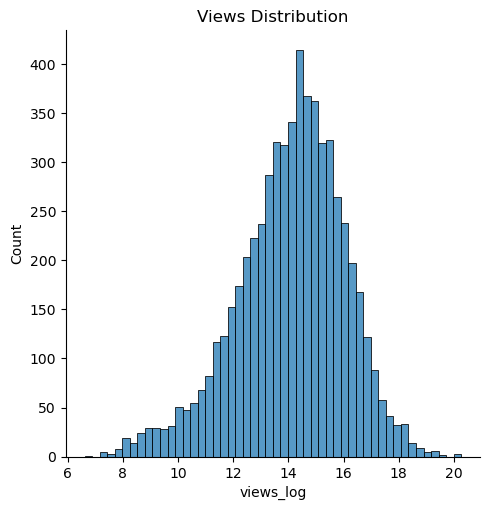

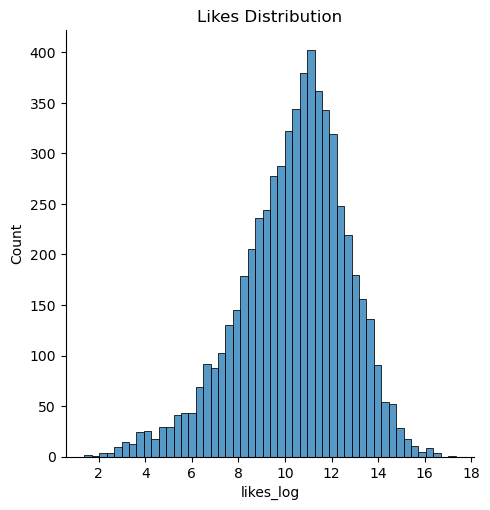

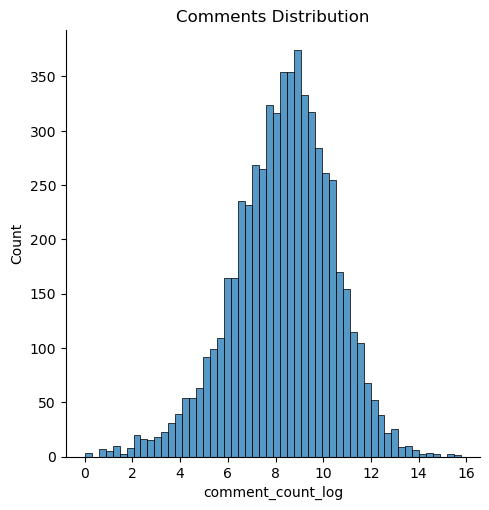

In [20]:
plot_df = input_data_agg
plot_df['views_log'] = np.log(plot_df.views)
plot_df['likes_log'] = np.log(plot_df.likes)
plot_df['comment_count_log'] = np.log(plot_df.comment_count)

sns.displot(plot_df['views_log']) # Need to limit for views to < 10000000 because of the skew
plt.title('Views Distribution')
sns.displot(plot_df['likes_log']) # Need to limit for views to < 1000000 because of the skew
plt.title('Likes Distribution')
sns.displot(plot_df['comment_count_log']) # Need to limit for views to < 1000000 because of the skew
plt.title('Comments Distribution')
plt.show()

As seen above, the distribution is more normal after applying the log transformation

## How to measure engagement rate?

Instead of using raw # of likes and comments as engagement metrics, we will look at likes ratio and comments ratio. Reason being, taking a ratio will allow us to compare across the videos given viws. Hence, we will calculate likes ratio and comments ratio as a measure of engagement rate, where

likes_ratio = # of likes / # of views

comments_ratio = # of comments / # of views

In [21]:
input_data_agg['likes_ratio'] = input_data_agg['likes'] / input_data_agg['views']
input_data_agg['comments_ratio'] = input_data_agg['comment_count'] / input_data_agg['views']

In [22]:
input_data_agg.head()

video_id                                              title  \
0  -0CMnp02rNY  Mindy Kaling's Daughter Had the Perfect Reacti...   
1  -0NYY8cqdiQ  Megan Mullally Didn't Notice the Interesting P...   
2  -1Hm41N0dUs  Cast of Avengers: Infinity War Draws Their Cha...   
3  -1yT-K3c6YI  YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...   
4  -2RVw2_QyxQ                     2017 Champions Showdown: Day 3   

            channel_title              publish_time     category_name  \
0            TheEllenShow  2018-06-04T13:00:00.000Z     Entertainment   
1            TheEllenShow  2018-01-29T14:00:39.000Z     Entertainment   
2       Jimmy Kimmel Live  2018-04-27T07:30:02.000Z            Comedy   
3             Molly Burke  2017-11-28T18:30:43.000Z  People and Blogs   
4  Saint Louis Chess Club  2017-11-12T02:39:01.000Z         Education   

                                   thumbnail_link  \
0  https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg   
1  https://i.ytimg.com/vi/-0NYY8cqdiQ/default.jpg   
2  https://i.ytimg.com/vi/-1Hm41N0dUs/default.jpg   
3  https://i.ytimg.com/vi/-1yT-K3c6YI/default.jpg   
4  https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg   

                                         description    views   likes  \
0  Ocean's 8 star Mindy Kaling dished on bringing...  4134702   52197   
1  Ellen and Megan Mullally have known each other...   563746    4429   
2  Benedict Cumberbatch, Don Cheadle, Elizabeth O...  5507675  112165   
3  Check out the video we did on the Merrell Twin...   777243   27305   
4  The Saint Louis Chess Club hosts a series of f...   208304    1351   

   comment_count min_trending_date  views_log  likes_log  comment_count_log  \
0           2215        2018-06-06  15.234926  10.862780           7.703008   
1             94        2018-02-01  13.242359   8.395929           4.543295   
2           4386        2018-04-29  15.521653  11.627726           8.386173   
3           2928        2017-11-29  13.563508  10.214825           7.982075   
4             62        2017-11-14  12.246754   7.208600           4.127134   

   likes_ratio  comments_ratio  
0     0.012624        0.000536  
1     0.007856        0.000167  
2     0.020365        0.000796  
3     0.035131        0.003767  
4     0.006486        0.000298

### Distribution of Likes Ratio and Comments Ratio

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


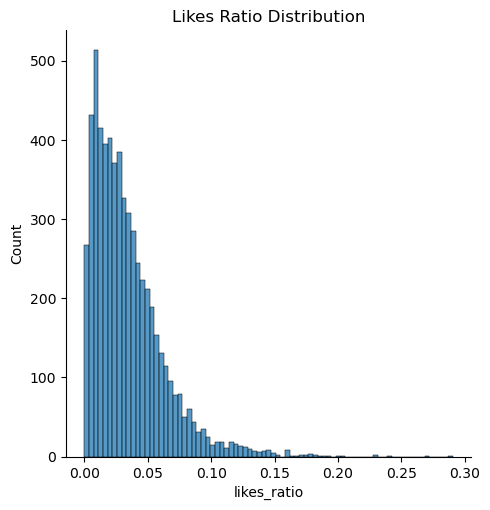

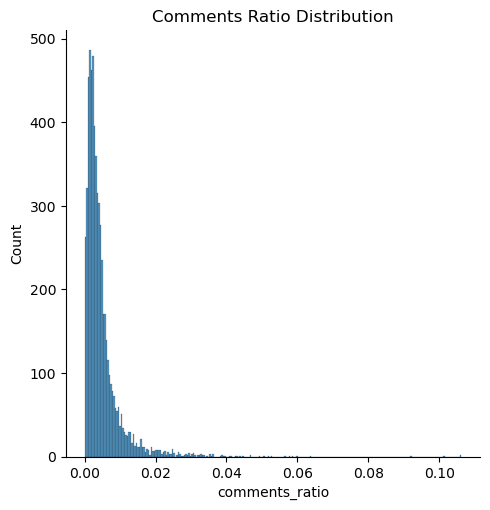

In [23]:
sns.displot(input_data_agg['likes_ratio']) # Need to limit for views to < 10000000 because of the skew
plt.title('Likes Ratio Distribution')
sns.displot(input_data_agg['comments_ratio']) # Need to limit for views to < 1000000 because of the skew
plt.title('Comments Ratio Distribution')
plt.show()

As observed, both likes ratio and comments ratio are skewed to the left.

## Top Videos in terms of Likes Ratio

### Entertainment

In [24]:
# Entertainment
df = input_data_agg[input_data_agg.category_name == 'Entertainment'][['video_id', 'title', 'channel_title', 'category_name', 'description', 'thumbnail_link', 
                 'views', 'likes', 'comment_count', 'likes_ratio', 'comments_ratio']]
df = df.sort_values(by = 'likes_ratio', ascending = False).head(5).reset_index(drop = True)
df

video_id                                   title       channel_title  \
0  ONI_06wGbsQ                   THINGS THAT ARE LOWER           Amber Liu   
1  xf-dywd3zx0  Official Trailer | BTS: Burn The Stage           BANGTANTV   
2  xPsEiZAOb_I          GIVING AWAY MY YOUTUBE ADSENSE              Caspar   
3  pDi7cezk9CA           COMING OUT (ELLE MILLS STYLE)      ElleOfTheMills   
4  U5EDORs8Jkk                Gateway to Sedona DEBUNK  CaptainDisillusion   

   category_name                                        description  \
0  Entertainment  LOOOWAHHH LOWAAAH~~ check out our new single!\...   
1  Entertainment  Episode 1 & 2 release on, March 29th 00:00AM K...   
2  Entertainment  I decided to give away the Adsense I made from...   
3  Entertainment  :)\n\n\nMy Second Channel: http://youtube.com/...   
4  Entertainment  Please consider supporting my videos on http:/...   

                                   thumbnail_link     views    likes  \
0  https://i.ytimg.com/vi/ONI_06wGbsQ/default.jpg    253507    46768   
1  https://i.ytimg.com/vi/xf-dywd3zx0/default.jpg  16772347  3027658   
2  https://i.ytimg.com/vi/xPsEiZAOb_I/default.jpg   1336644   195410   
3  https://i.ytimg.com/vi/pDi7cezk9CA/default.jpg   6377856   905292   
4  https://i.ytimg.com/vi/U5EDORs8Jkk/default.jpg   1237166   156169   

   comment_count  likes_ratio  comments_ratio  
0           4285     0.184484        0.016903  
1         228701     0.180515        0.013636  
2          12930     0.146194        0.009673  
3         127482     0.141943        0.019988  
4          11145     0.126231        0.009008

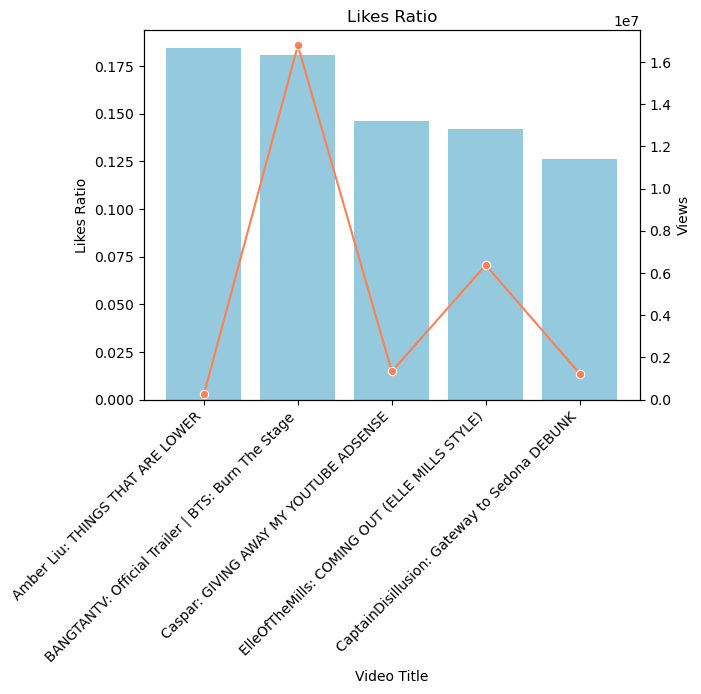

In [25]:
df['plot_title'] = df['channel_title'] + ': ' + df['title']
df = df.sort_values(by = 'likes_ratio', ascending = False).reset_index(drop = True)

fig, ax1 = plt.subplots()

xlabels = df.plot_title
sns.barplot(x='plot_title', y='likes_ratio', data=df, ax=ax1, color='skyblue')
ax1.set_ylabel('Likes Ratio')
ax2 = ax1.twinx()
sns.lineplot(x='plot_title', y='views', data=df, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('Views')
ax2.set_ylim(0,17500000)
ax1.set_xticklabels(xlabels, rotation=45, ha='right')
plt.title('Likes Ratio')
ax1.set_xlabel('Video Title')
plt.show()

As seen in the graph above, Amber Liu video is the most engaging in terms of Likes Ratio followed by BANGTANTV video. However, BANGTANTV has mich higher views compared to Amber Liu video (16M vs 250k). Clearly, we are more confident about BANGTANTV video being better as it has close to16M views. If we rely on raw likes ratio, we are unable to separate these two videos out. Hence, we need to adjust for views so that videos with more views stand out better than a video with less weight with similar engagement rates.

## Top Videos in terms of Comments Ratio

Let's analyze the same for Comments

### Entertainment

In [26]:
# Entertainment
df = input_data_agg[input_data_agg.category_name == 'Entertainment'][['video_id', 'title', 'channel_title', 'category_name', 'description', 'thumbnail_link', 
                 'views', 'likes', 'comment_count', 'likes_ratio', 'comments_ratio']]
df = df.sort_values(by = 'comments_ratio', ascending = False).head(5).reset_index(drop = True)
df

video_id                                              title  \
0  GnGPAYvve1A                         #ProudToCreate: Pride 2018   
1  dH4ZXmeEJXs      STRANGERS DO MY MAKEUP ON HOLLYWOOD BOULEVARD   
2  hmkSBiZ6XoQ                         18 MILLION SUBSCRIBERS!!!!   
3  7Bgj9c48zHU        How to do a beauty Vlog for Tarte Cosmetics   
4  JckuMy_aYso  I FILLED MY SWIMMING POOL WITH 1,000 POOL FLOA...   

       channel_title  category_name  \
0  YouTube Spotlight  Entertainment   
1      James Charles  Entertainment   
2             DanTDM  Entertainment   
3           Sailor J  Entertainment   
4          Papa Jake  Entertainment   

                                         description  \
0  You don't just imagine a better future – you c...   
1  HI SISTERS! I've only had my makeup done a few...   
2  ► Subscribe and join TeamTDM! :: http://bit.ly...   
3  Song: Samurai Champloo Hip Hop Remix- SparX Be...   
4  In todays ultimate video we took a break from ...   

                                   thumbnail_link     views    likes  \
0  https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg    597669    29781   
1  https://i.ytimg.com/vi/dH4ZXmeEJXs/default.jpg  11404212  1438907   
2  https://i.ytimg.com/vi/hmkSBiZ6XoQ/default.jpg   9180895   522815   
3  https://i.ytimg.com/vi/7Bgj9c48zHU/default.jpg    577291    72289   
4  https://i.ytimg.com/vi/JckuMy_aYso/default.jpg    436041    16998   

   comment_count  likes_ratio  comments_ratio  
0          55110     0.049829        0.092208  
1         725755     0.126173        0.063639  
2         452286     0.056946        0.049264  
3          24545     0.125221        0.042518  
4          16819     0.038983        0.038572

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128167 (\N{DROPLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129412 (\N{UNICORN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


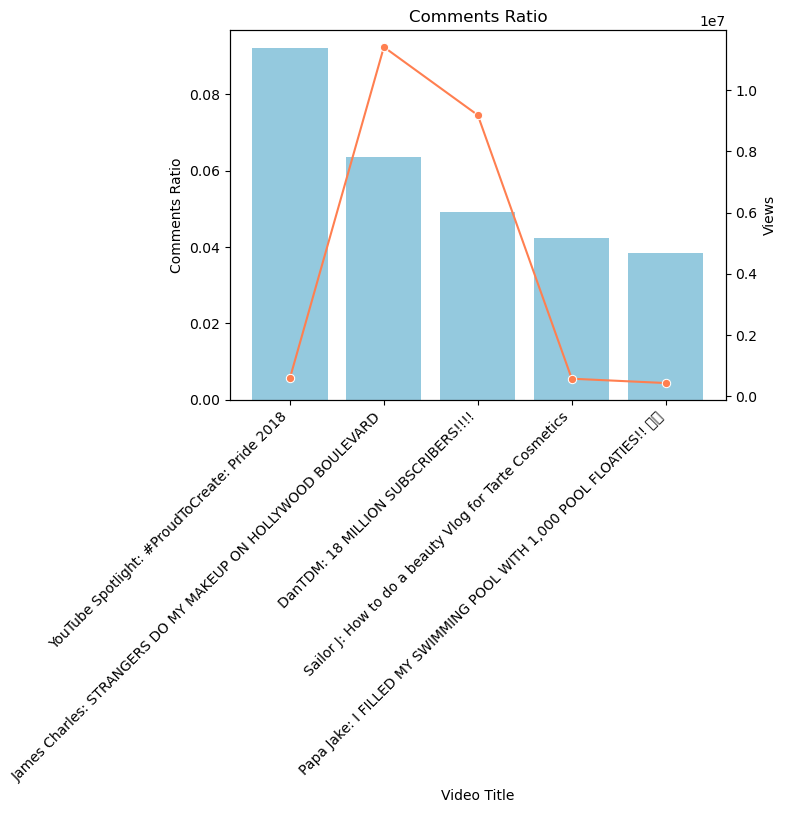

In [27]:
df['plot_title'] = df['channel_title'] + ': ' + df['title']
df = df.sort_values(by = 'comments_ratio', ascending = False).reset_index(drop = True)

fig, ax1 = plt.subplots()

xlabels = df.plot_title
sns.barplot(x='plot_title', y='comments_ratio', data=df, ax=ax1, color='skyblue')
ax1.set_ylabel('Comments Ratio')
ax2 = ax1.twinx()
sns.lineplot(x='plot_title', y='views', data=df, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('Views')
# ax2.set_ylim(0,17500000)
ax1.set_xticklabels(xlabels, rotation=45, ha='right')
plt.title('Comments Ratio')
ax1.set_xlabel('Video Title')
plt.show()

Youtube Spotlight video is the most engaging in terms of Comments with the comments ratio of 9%. James Charles video is the next most engaging with comments ratio of 6%. However, similar to what we saw with likes ratio, we have 2nd highest video with close to 11M views whereas the top most video only had 597k views.

Do we feel more confident that the James Charles video is more engaging given the number of views? Or do we think the Youtube Spotlight video iss till the most engaging even though it only had 597k views. Let's find out below!

## How to adjust the engagement rate to remove bias?
### Using Empirical Bayes Adjustment

Our goal is to adjust the engagement rate to provide a better estimate of content's performance. We can use Empirical Bayes algorithm to account for the video views. Here's how it works:

We can fit a beta distribution for the engagement rates. Why beta distribution? Because it works best for random variables which are of the form proportion or probability. Also, the shape of the distribution is flexible so it can be used to fit a skewed distribution which is common for variables of type proportions.

The fitted beta distribution will return two parameters: alpha and beta which control the shape of the beta distribution. Once we fit the beta distribution, we can update the engagement rate or likes ratio in our case using the following formula:

likes_ratio_updated = content_likes + alpha / (content_views + alpha + beta)

We have content_views + alpha + beta in the denominator. For the video with high number of views, the alpha and beta will not have much of an impact on the updated engagement rate. However on the other hand, if the video has less number of views, alpha and beta will have much bigger impact.

The good thing about this approach is we can have fit the beta distribution for different groups such as Category to account for the difference in engagement rates across categories.

### Adjust the engagement rates

We will adjust the engagement rates for both Likes and Comments

In [28]:
categories = input_data_agg.groupby(by = ['category_name']).size().sort_values(ascending = False).index.tolist()
categories

['Entertainment',
 'Music',
 'How to and Style',
 'Comedy',
 'News & Politics',
 'People and Blogs',
 'Sport',
 'Science and Technology',
 'Film and Animation',
 'Education',
 'Pets and Animals',
 'Gaming',
 'Cars and Vehicles',
 'Travel and Events',
 'Non Profits and Activism']

In [29]:
# features = ['likes_ratio', 'comments_ratio']
feature_dict = {'likes_ratio': ['likes', 'views'],
                'comments_ratio': ['comment_count', 'views']
               }
parameters_dict = {}
for category in categories:
    for feature in feature_dict.keys():
        print('Category: {} for feature: {}'.format(category, feature))
        category_data = input_data_agg[input_data_agg.category_name == category]
        category_data[feature] = np.where(category_data[feature] == 0, 0.00001, category_data[feature])
        category_data[feature] = np.where(category_data[feature] == 1, 0.99999, category_data[feature])
        alpha_val, beta_val, _, _ = beta.fit(category_data[feature], floc = 0)
        print('alpha: {} and beta: {}'.format(alpha_val, beta_val))
        parameters_dict['{}_{}_alpha'.format(category, feature)] = alpha_val
        parameters_dict['{}_{}_beta'.format(category, feature)] = beta_val
        numerator_col = feature_dict[feature][0]
        denominator_col = feature_dict[feature][1]
        likes_ratio_adjusted = (category_data[numerator_col] + alpha_val) / (category_data[denominator_col] + alpha_val + beta_val)
        input_data_agg.loc[category_data.index, '{}_adjusted'.format(feature)] = likes_ratio_adjusted
        print('\n')

/var/folders/rr/d5y6fphs6yj4z3qxz1njjv_m0000gn/T/ipykernel_21378/3202895268.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data[feature] = np.where(category_data[feature] == 0, 0.00001, category_data[feature])
/var/folders/rr/d5y6fphs6yj4z3qxz1njjv_m0000gn/T/ipykernel_21378/3202895268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data[feature] = np.where(category_data[feature] == 1, 0.99999, category_data[feature])
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/scipy

Category: Entertainment for feature: likes_ratio
alpha: 1.529118889066723 and beta: 50385.254851813894


Category: Entertainment for feature: comments_ratio
alpha: 0.948943046656052 and beta: 3404180.741813942


Category: Music for feature: likes_ratio
alpha: 2.2945940409155483 and beta: 958301.8203880612


Category: Music for feature: comments_ratio
alpha: 1.5248023175781589 and beta: 45609.1194073668


Category: How to and Style for feature: likes_ratio
alpha: 3.4474073779114858 and beta: 25.56343577720798


Category: How to and Style for feature: comments_ratio
alpha: 1.3655149453445425 and beta: 39228766954510.875


Category: Comedy for feature: likes_ratio
alpha: 1.6227654267570135 and beta: 9.619565767568083


Category: Comedy for feature: comments_ratio
alpha: 1.0961138531596424 and beta: 247705429769.0703


Category: News & Politics for feature: likes_ratio
alpha: 1.4790285359285127 and beta: 10257.060533095002


Category: News & Politics for feature: comments_ratio
alpha: 0.75

## Top videos in terms of Likes Ratio after adjustment

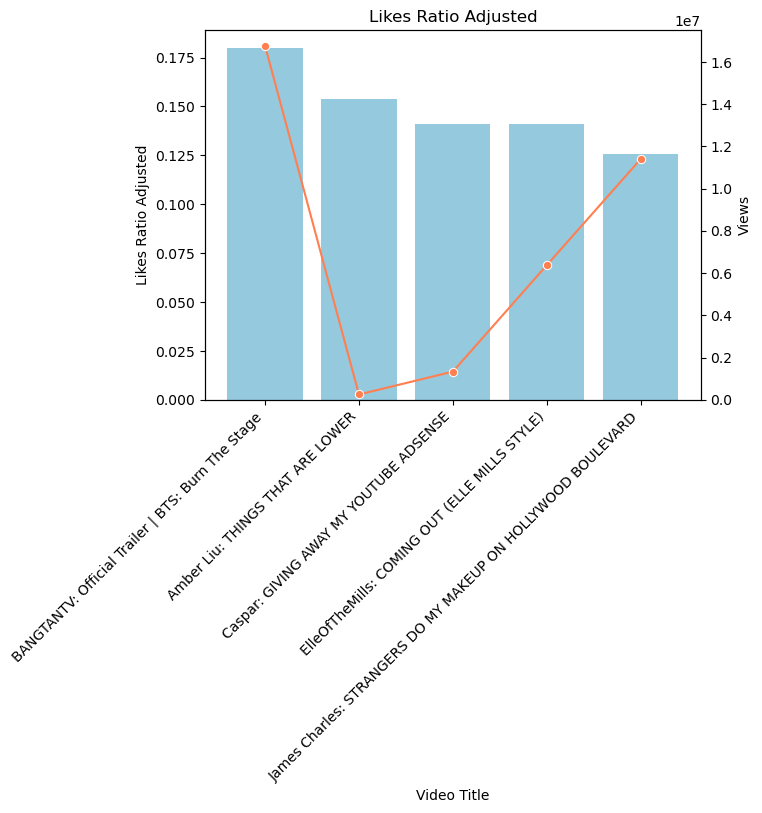

In [30]:
# Entertainment
df = input_data_agg[input_data_agg.category_name == 'Entertainment'][['video_id', 'title', 'channel_title', 'category_name', 'description', 'thumbnail_link', 
                 'views', 'likes', 'comment_count', 'likes_ratio_adjusted', 'comments_ratio_adjusted']]
df = df.sort_values(by = 'likes_ratio_adjusted', ascending = False).head(5).reset_index(drop = True)

df['plot_title'] = df['channel_title'] + ': ' + df['title']
df = df.sort_values(by = 'likes_ratio_adjusted', ascending = False).reset_index(drop = True)

fig, ax1 = plt.subplots()

xlabels = df.plot_title
sns.barplot(x='plot_title', y='likes_ratio_adjusted', data=df, ax=ax1, color='skyblue')
ax1.set_ylabel('Likes Ratio Adjusted')
ax2 = ax1.twinx()
sns.lineplot(x='plot_title', y='views', data=df, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('Views')
ax2.set_ylim(0,17500000)
ax1.set_xticklabels(xlabels, rotation=45, ha='right')
plt.title('Likes Ratio Adjusted')
ax1.set_xlabel('Video Title')
plt.show()

Our hypothesis was that the BANGTANTV video could be more engaging givent hat it has 16M views compared to 250k views of Amber Liu video. After adjusting the raw likes ratio, we can see that our hypothesis was true. After adjustment, BANGTANTV has the best likes ratio.

Hence, we were able to account for the volume bias and make the videos with more views stand out better than the video with less views for similar engagement.

## Top videos in terms of Comments Ratio after adjustment

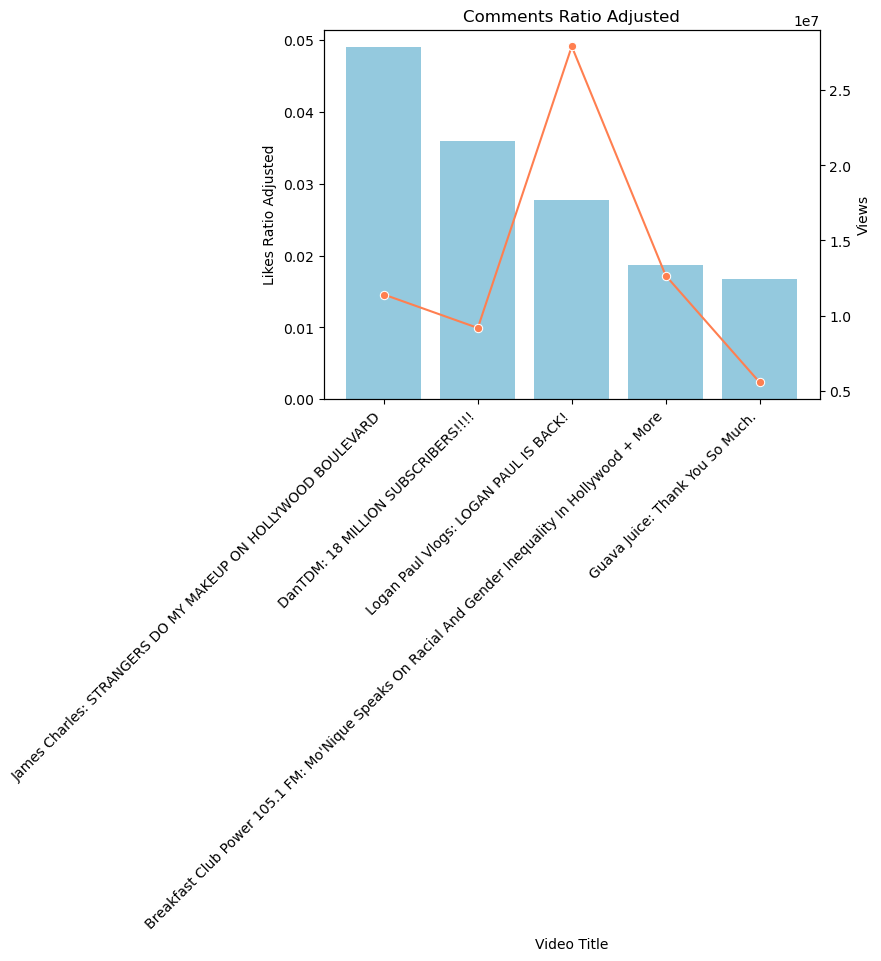

In [31]:
# Entertainment
df = input_data_agg[input_data_agg.category_name == 'Entertainment'][['video_id', 'title', 'channel_title', 'category_name', 'description', 'thumbnail_link', 
                 'views', 'likes', 'comment_count', 'likes_ratio_adjusted', 'comments_ratio_adjusted']]
df = df.sort_values(by = 'comments_ratio_adjusted', ascending = False).head(5).reset_index(drop = True)

df['plot_title'] = df['channel_title'] + ': ' + df['title']
df = df.sort_values(by = 'comments_ratio_adjusted', ascending = False).reset_index(drop = True)

fig, ax1 = plt.subplots()

xlabels = df.plot_title
sns.barplot(x='plot_title', y='comments_ratio_adjusted', data=df, ax=ax1, color='skyblue')
ax1.set_ylabel('Likes Ratio Adjusted')
ax2 = ax1.twinx()
sns.lineplot(x='plot_title', y='views', data=df, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('Views')
# ax2.set_ylim(0,17500000)
ax1.set_xticklabels(xlabels, rotation=45, ha='right')
plt.title('Comments Ratio Adjusted')
ax1.set_xlabel('Video Title')
plt.show()

Our hypothesis for engagement based on Comments Ratio was that James Charles video could be more engaging given it had 11M views. Which is what we are able to confirm from the chart above after adjustment. The top most video based on just the raw comments ratio does not even feature in the top5. This shows the amount of bias in the data if we jsut rely on the raw engagment numbers.

## Combine Likes and Comments Ratio

Now we need to combine the engagement rates based on Likes and COmments to have one engagment rate per video. We can compare engagment rate for each video by comparing against the expected engagement rate for that particular video's category. The expected engagmeent rate will be nothing but the median engagment rate for that category. The median engagment rate can be calculated using the fitted alpha and beta parameters.

### Normalize

We will use median engagement rate and IQR to compute z-score which we will use to measure how far is the given video's engagement rate from the expected engagement rate. Once we have the z-score, we can do min-max normalization to have each engagement type score between 0 and 1

In [32]:
max_z_score = 10
min_z_score = -10
for category in categories:
    for feature in feature_dict.keys():
        print('Category: {} for feature: {}'.format(category, feature))
        category_data = input_data_agg[input_data_agg.category_name == category]
        alpha_val = parameters_dict['{}_{}_alpha'.format(category, feature)]
        beta_val = parameters_dict['{}_{}_beta'.format(category, feature)]
        median_engagment_rate = beta.median(alpha_val, beta_val)
        adjusted_rates = category_data[feature +'_adjusted']
        iqr_engagment_rate = iqr(adjusted_rates)
        print('Median: {} and IQR: {}'.format(median_engagment_rate, iqr_engagment_rate))
        z_score = (adjusted_rates - median_engagment_rate) / iqr_engagment_rate
        norm_score = (z_score - min_z_score) * 100 / (max_z_score - min_z_score)
        input_data_agg.loc[category_data.index, '{}_z_score'.format(feature)] = z_score
        input_data_agg.loc[category_data.index, '{}_score'.format(feature)] = norm_score
        print('\n')

# Clip scores between 0 and 100
input_data_agg['likes_ratio_score'] = np.where(input_data_agg['likes_ratio_score'] > 100, 
                                               100, input_data_agg['likes_ratio_score'])
input_data_agg['likes_ratio_score'] = np.where(input_data_agg['likes_ratio_score'] < 0, 
                                               0, input_data_agg['likes_ratio_score'])

input_data_agg['comments_ratio_score'] = np.where(input_data_agg['comments_ratio_score'] > 100, 
                                               100, input_data_agg['comments_ratio_score'])
input_data_agg['comments_ratio_score'] = np.where(input_data_agg['comments_ratio_score'] < 0, 
                                               0, input_data_agg['comments_ratio_score'])

Category: Entertainment for feature: likes_ratio
Median: 2.404909920554631e-05 and IQR: 0.020507325226187867


Category: Entertainment for feature: comments_ratio
Median: 1.8912638061485796e-07 and IQR: 0.0014718651521841428


Category: Music for feature: likes_ratio
Median: 2.0570164713353595e-06 and IQR: 0.03684085401598017


Category: Music for feature: comments_ratio
Median: 2.647397144324059e-05 and IQR: 0.0034340659799627195


Category: How to and Style for feature: likes_ratio
Median: 0.11007215570917965 and IQR: 0.025571628713412467


Category: How to and Style for feature: comments_ratio
Median: 2.6776710147043313e-14 and IQR: 3.8560983528072547e-10


Category: Comedy for feature: likes_ratio
Median: 0.12319799554256698 and IQR: 0.04387096099085999


Category: Comedy for feature: comments_ratio
Median: 3.1751010823078142e-12 and IQR: 9.303918405965838e-08


Category: News & Politics for feature: likes_ratio
Median: 0.0001133068642467574 and IQR: 0.008745630946558924


Category

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


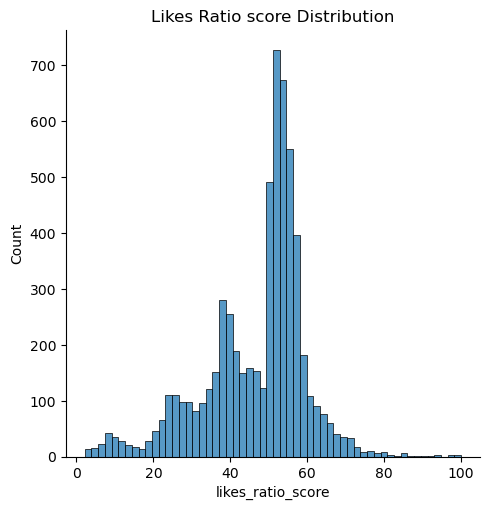

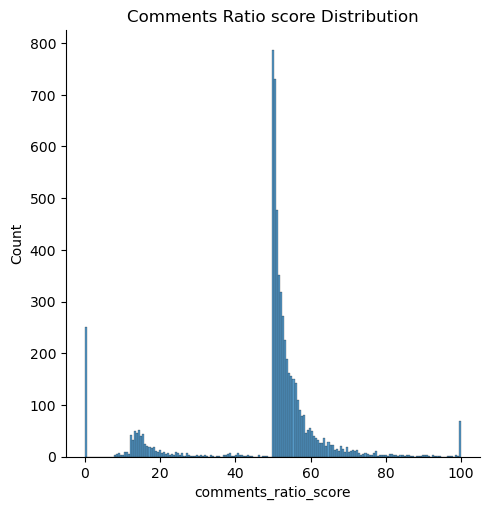

In [33]:
# Plot the distribution of Normalized Score
sns.displot(input_data_agg['likes_ratio_score']) # Need to limit for views to < 10000000 because of the skew
plt.title('Likes Ratio score Distribution')
sns.displot(input_data_agg['comments_ratio_score']) # Need to limit for views to < 1000000 because of the skew
plt.title('Comments Ratio score Distribution')
plt.show()

### Compute Overall Score

We can combine the Likes Normalized Score and Comments Normalized Score to come up with the Overall Score. The Likes normalized score and Comments Normalized Score can come in handy when digging deep into why a score has high or low overall score.

In [34]:
input_data_agg['overall_score'] = (input_data_agg['likes_ratio_score'] + 
                                   input_data_agg['comments_ratio_score']) / 2

/Users/ankitgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


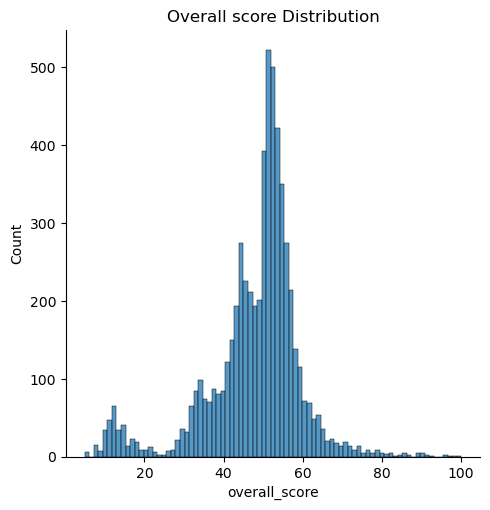

In [35]:
# Plot the distribution of Overall Score
sns.displot(input_data_agg['overall_score'])
plt.title('Overall score Distribution')
plt.show()

### Visualize Top & Bottom Content in terms of Overall Score

In [36]:
from PIL import Image, ImageDraw, ImageFont
import requests
import io
from textwrap import wrap

In [37]:
def convert_pil_numpy(img):
    return np.array(Image.open(io.BytesIO(img)).convert('RGBA').resize((150, 200), Image.Resampling.LANCZOS))

In [38]:
def get_figure(collect_list, figure_title):
    fig, axs = plt.subplots(4, 5, figsize = ((400 * 5)/100, (550 * 5)/100), dpi = 100)
    plt.subplots_adjust(wspace=0.03, hspace=0.10)
    axs = axs.flatten()
    count = 0
    for image, ax in zip(collect_list, axs):
        ax.imshow(image[1])
        image_title = image[2] + ': ' + image[3]
        ax.set_title("\n".join(wrap(image_title, 30)), fontsize = 12)
        ax.text(0.5, -0.05, "Overall Score: {}".format(np.round(image[4], 2)), size = 12, 
                ha = "center", transform=ax.transAxes)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count += 1
    fig.suptitle(figure_title)

#### Top Content

In [39]:
top20_videos = input_data_agg.sort_values(by = 'overall_score', ascending = False).reset_index(drop = True).head(20)
collect_list = [(c[1].video_id, convert_pil_numpy(requests.get(c[1].thumbnail_link).content), c[1].title, c[1].channel_title, 
                 c[1].overall_score) for c in top20_videos.iterrows()]

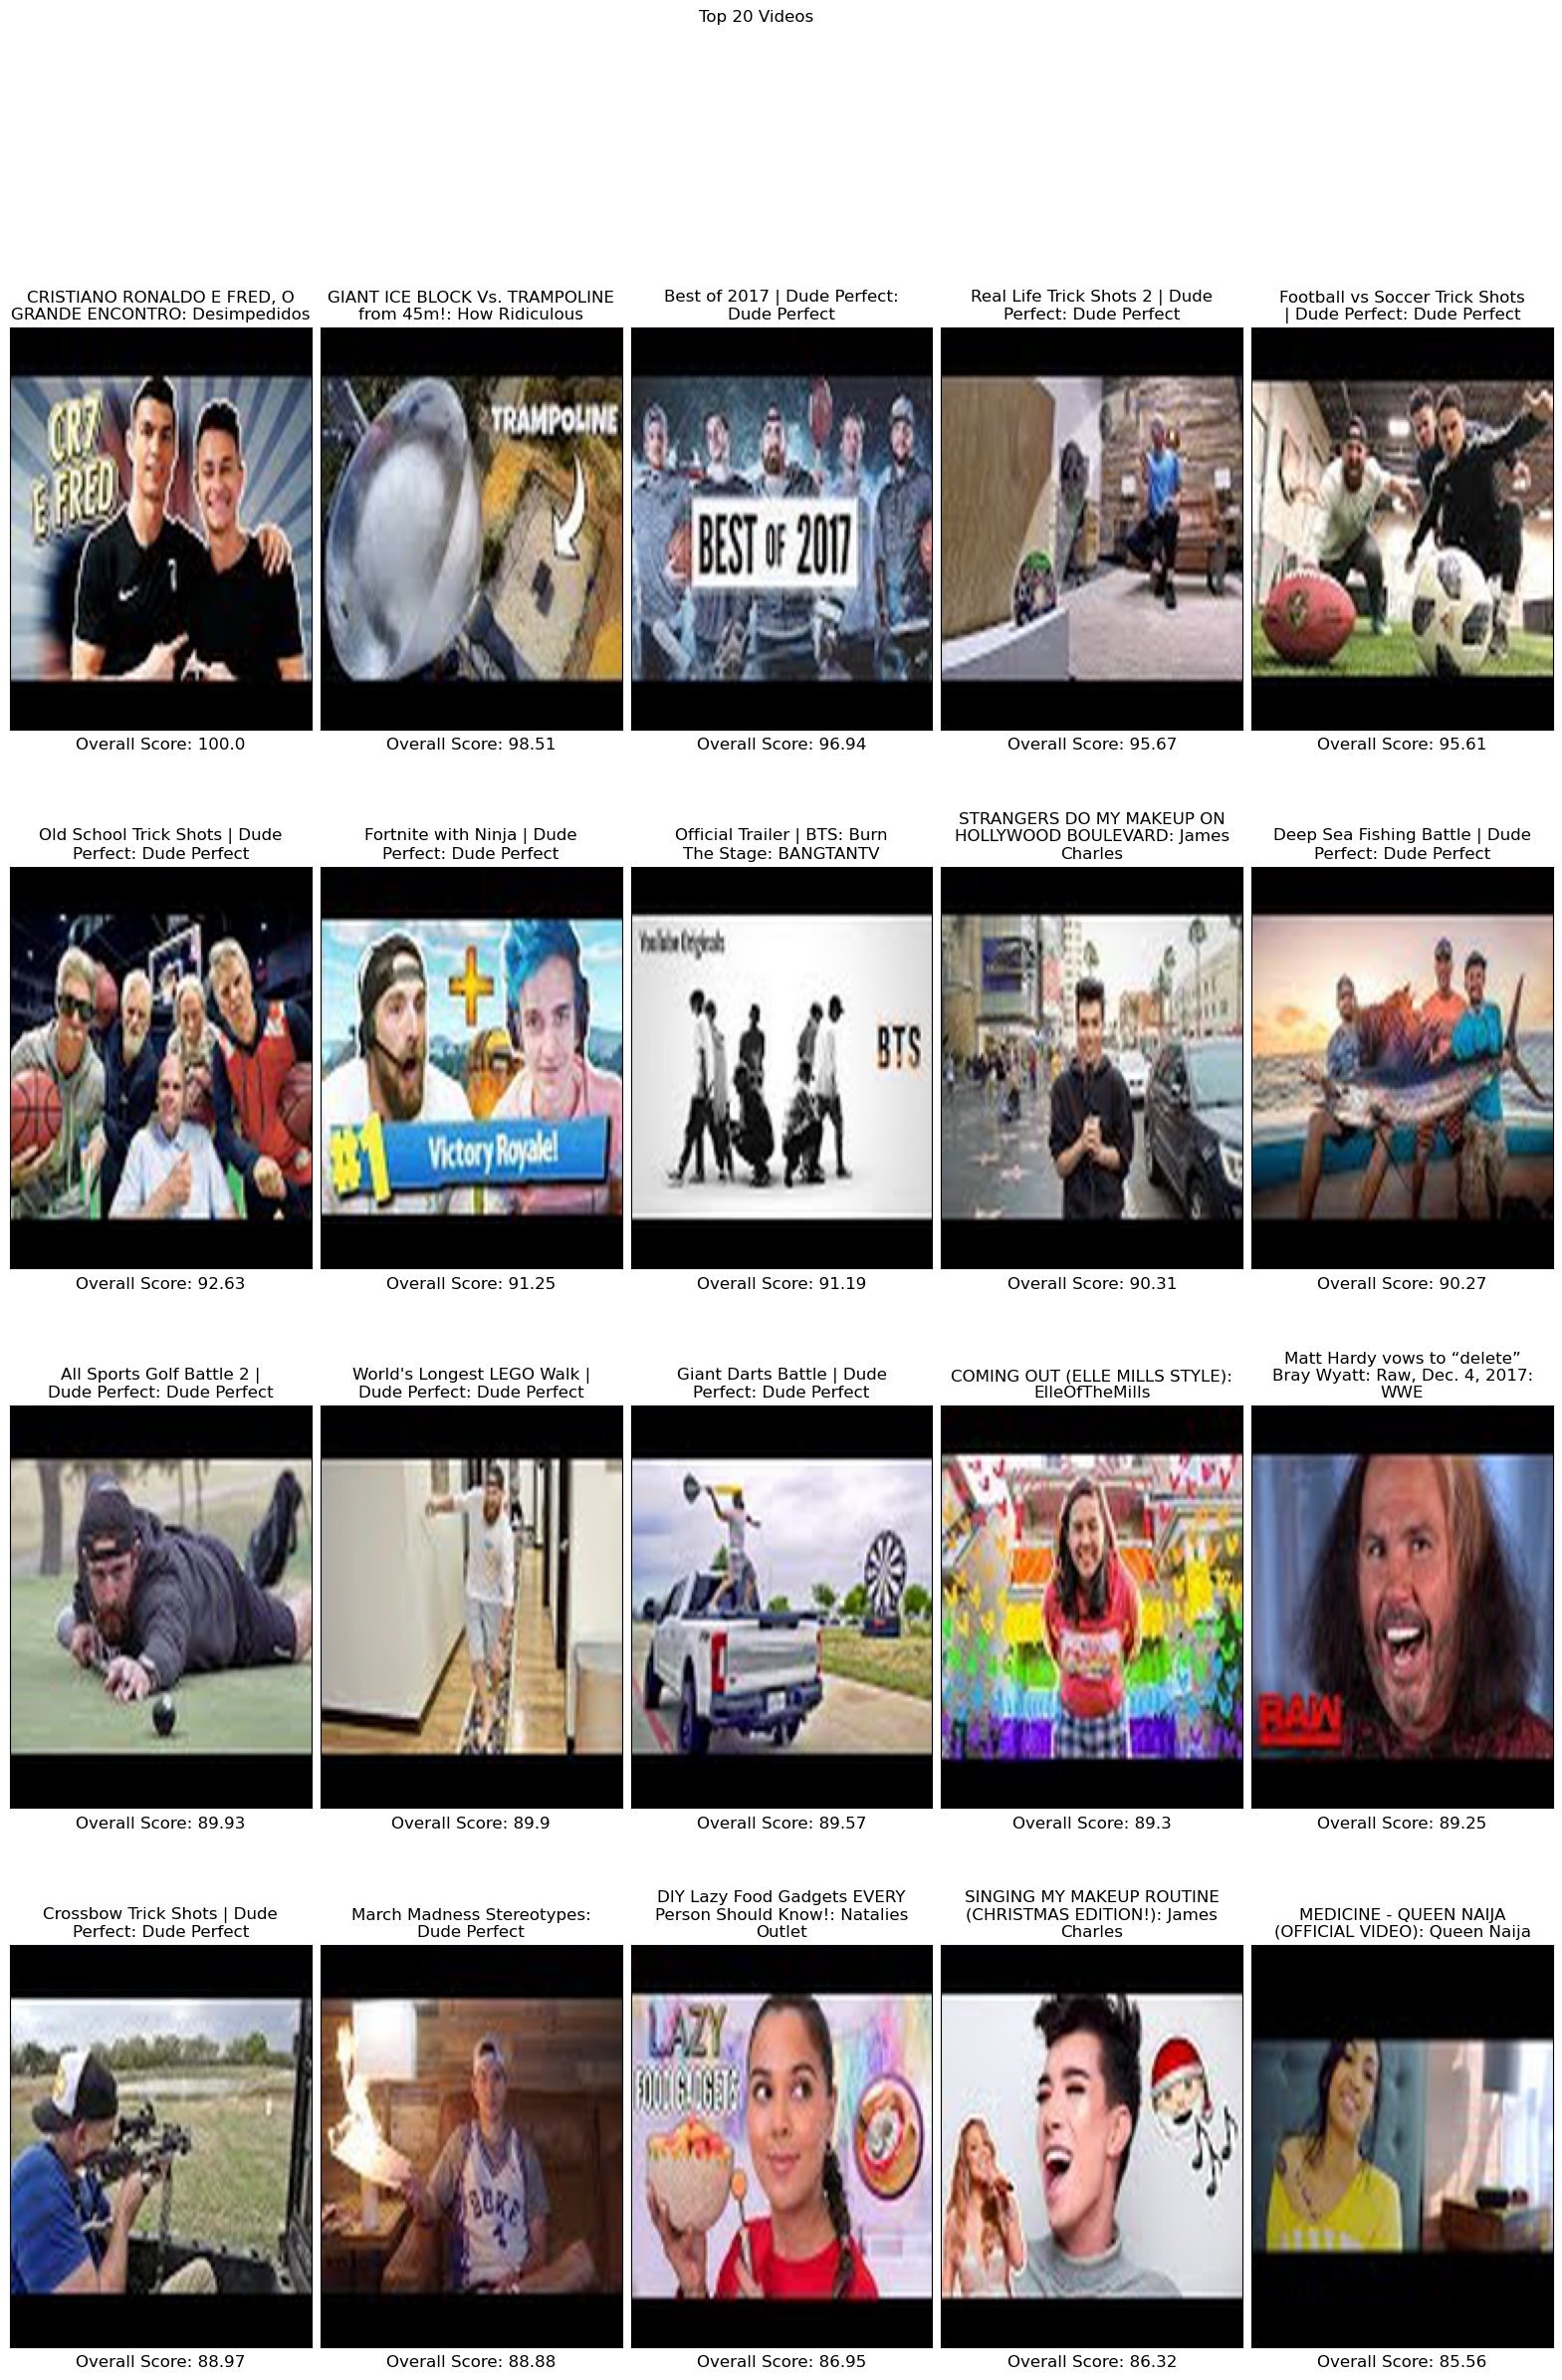

In [40]:
get_figure(collect_list, 'Top 20 Videos')

#### Bottom Content

In [41]:
bottom20_videos = input_data_agg.sort_values(by = 'overall_score', ascending = True).reset_index(drop = True).head(20)
collect_list = [(c[1].video_id, convert_pil_numpy(requests.get(c[1].thumbnail_link).content), c[1].title, c[1].channel_title, 
                 c[1].overall_score) for c in bottom20_videos.iterrows()]

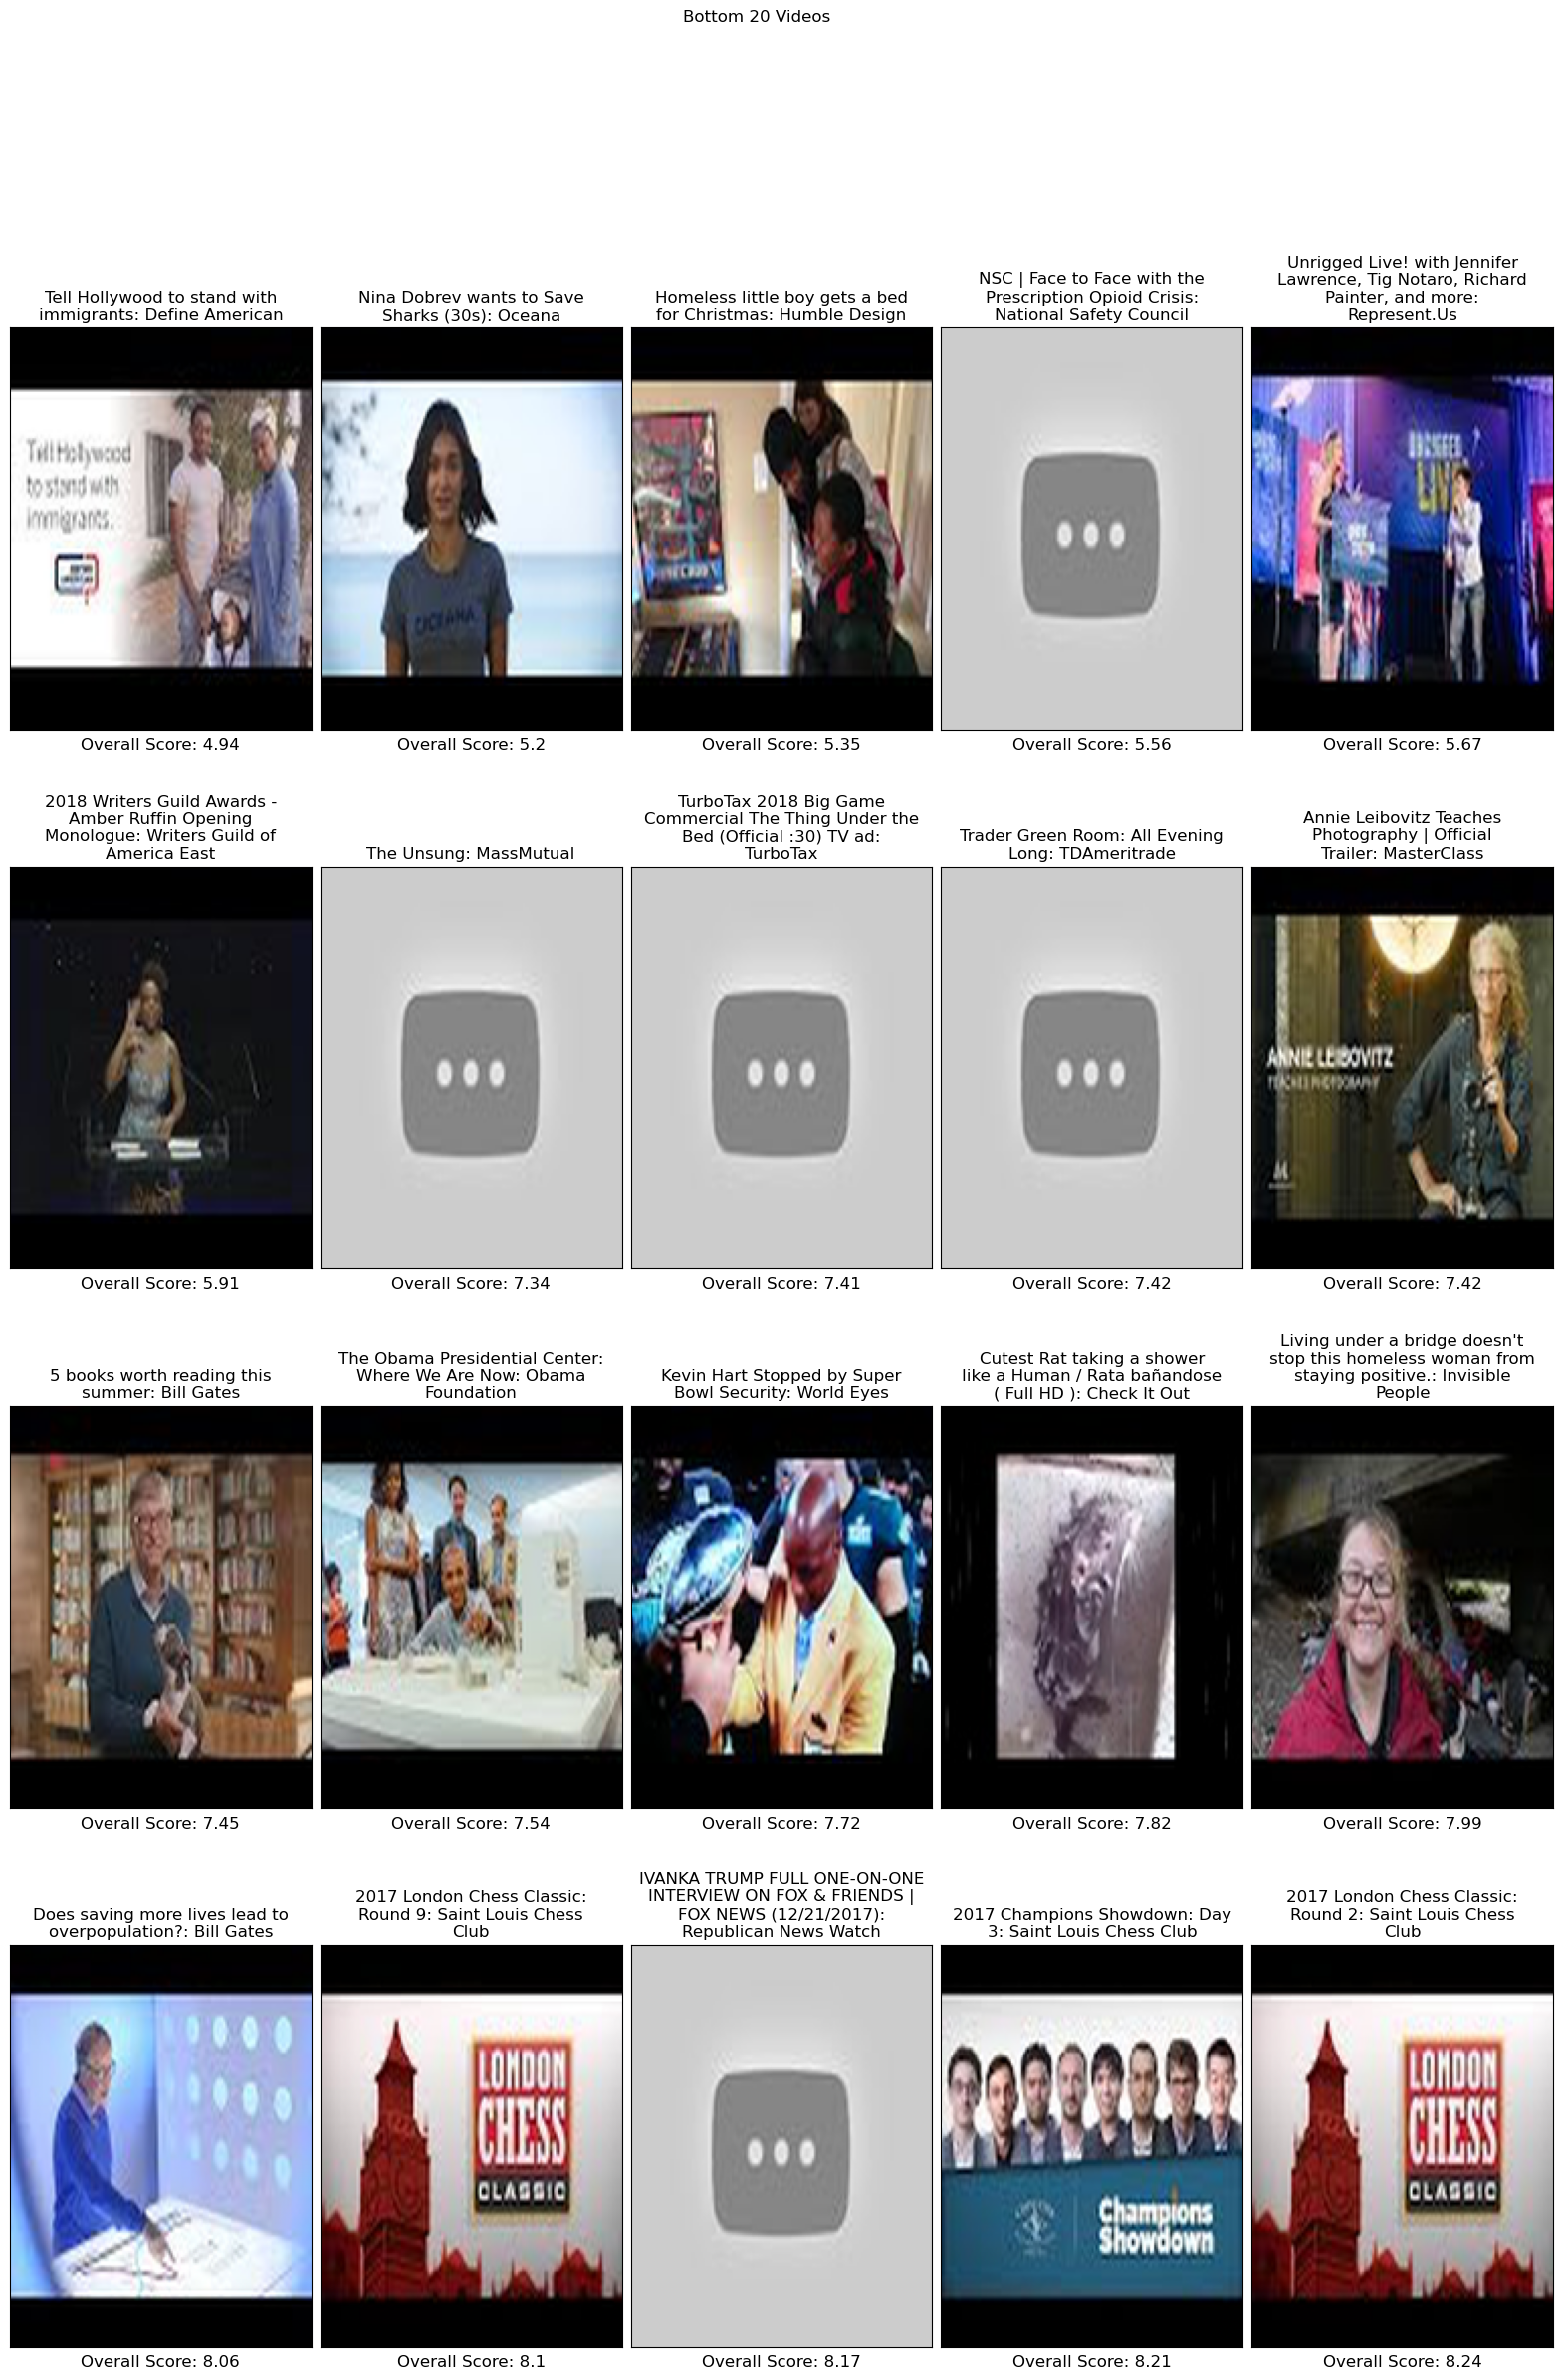

In [42]:
get_figure(collect_list, 'Bottom 20 Videos')

## Conclusion

Empirical Bayes Adjustment is a great method to account for the bias when dealing with data such as click-through-rate which is very common in campaign performance measurement, targeted marketing etc. It's simple but very effective